In [7]:
import numpy as np
import os
from scipy.misc import imread, imresize, rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
print ("PACKAGES LOADED")

ImportError: cannot import name 'rgb2gray'

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [9]:
# CURRENT FOLDER
cwd = os.getcwd() 
# RELATIVE PATHS OF FOLDERS CONSTAINING IMAGES

paths = { "./datas/retina/normal"
        , "./datas/retina/abnormal"}
'''
# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
paths = { "../img_dataset/face_emotion/0"
        , "../img_dataset/face_emotion/1"
        , "../img_dataset/face_emotion/2"
        , "../img_dataset/face_emotion/3"
        , "../img_dataset/face_emotion/4"
        , "../img_dataset/face_emotion/5"
        , "../img_dataset/face_emotion/6"
        }
'''


'\n# (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)\npaths = { "../img_dataset/face_emotion/0"\n        , "../img_dataset/face_emotion/1"\n        , "../img_dataset/face_emotion/2"\n        , "../img_dataset/face_emotion/3"\n        , "../img_dataset/face_emotion/4"\n        , "../img_dataset/face_emotion/5"\n        , "../img_dataset/face_emotion/6"\n        }\n'

0-class can have upto 16 images
0-class has 16 images
1-class can have upto 16 images
1-class has 16 images
TOTAL 32 IMAGES LOADED.


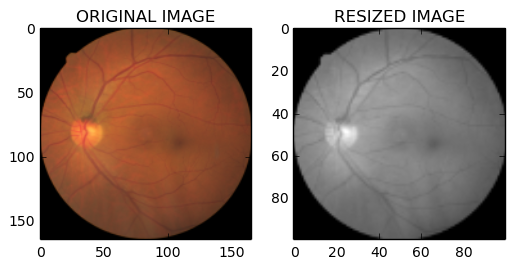

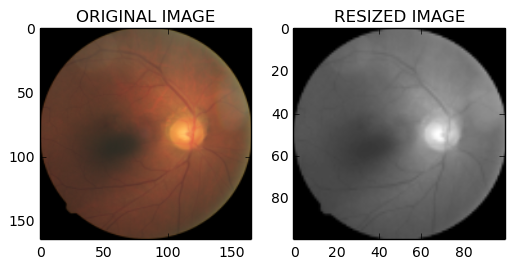

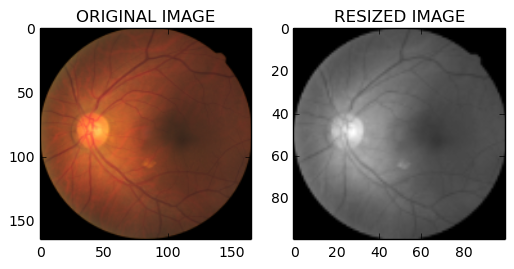

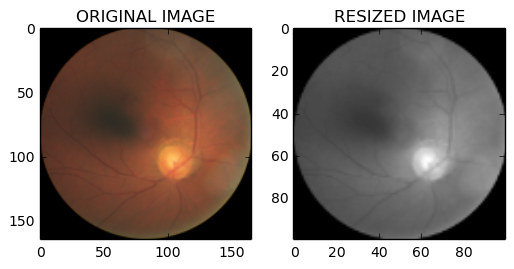

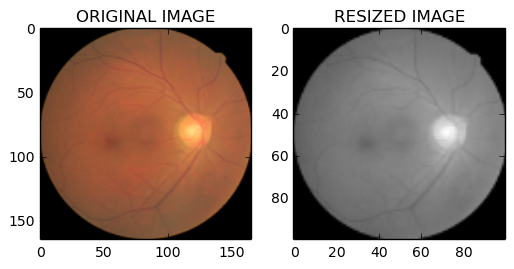

25 TRAIN AND 7 TEST IMAGES
EACH IAMGE IS (100, 100, ) = 10000-DIMENSINOAL VECTOR
DATA SAVED TO /home/wjcheon/MachineLearning/ml_Tensorflow/notebooks/data_retina.npz


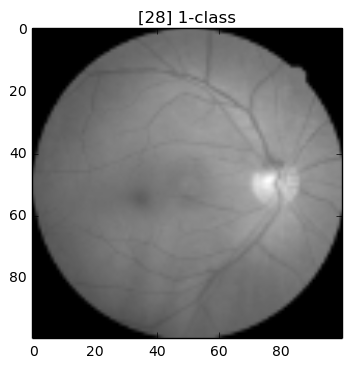

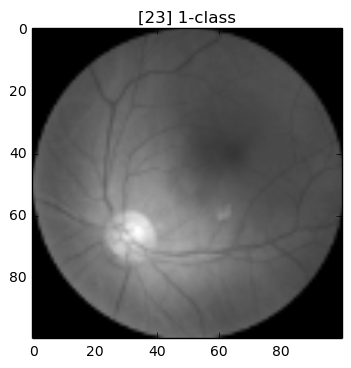

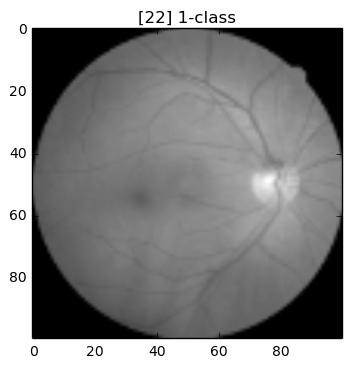

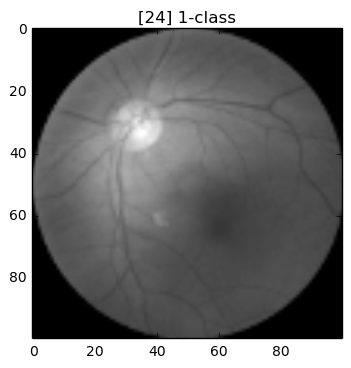

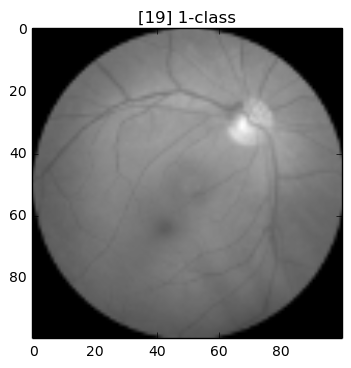

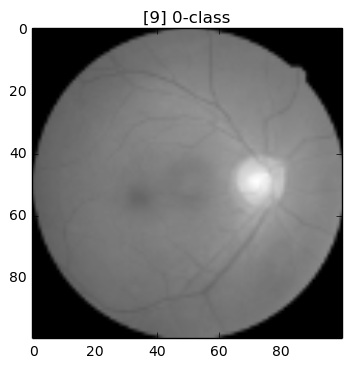

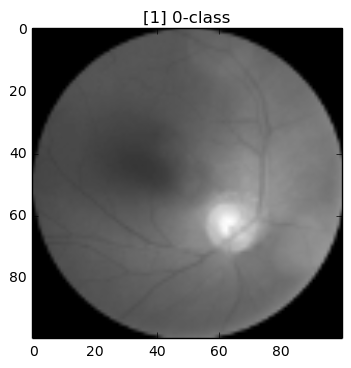

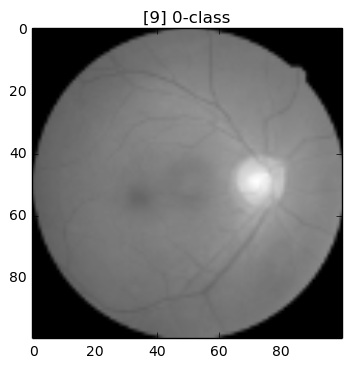

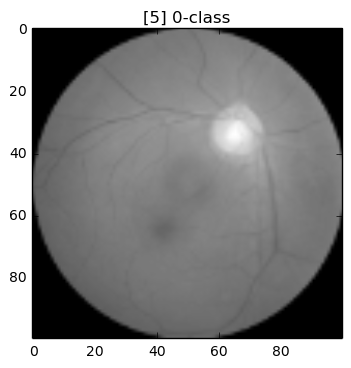

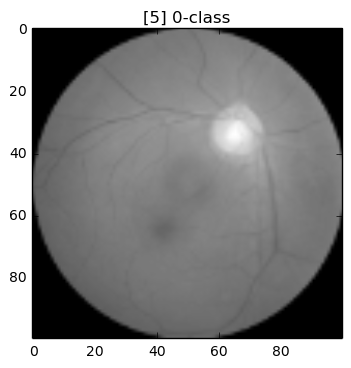

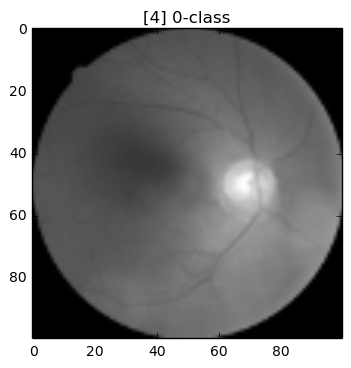

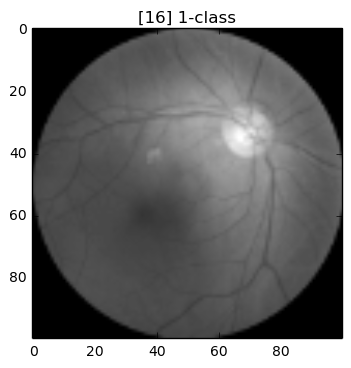

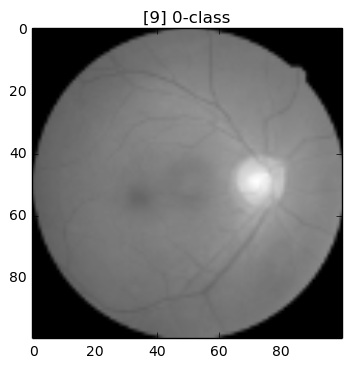

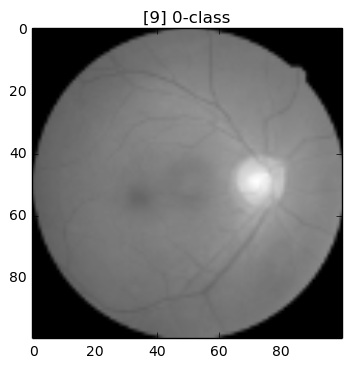

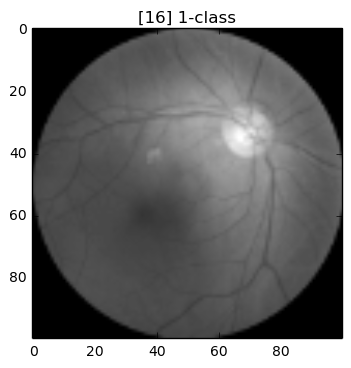

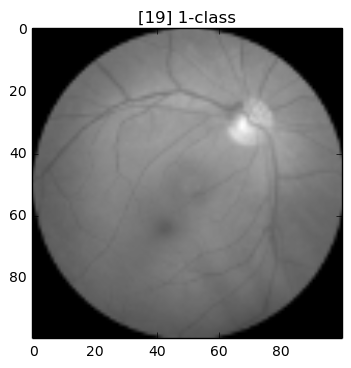

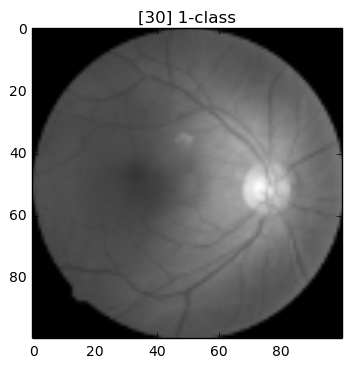

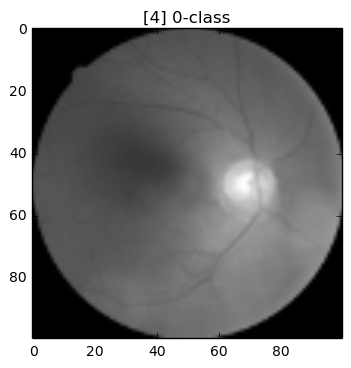

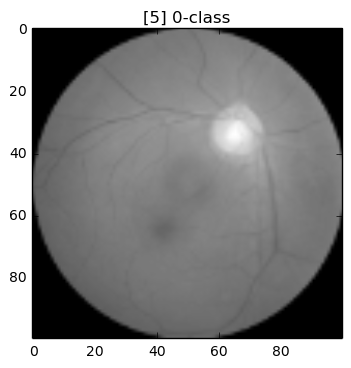

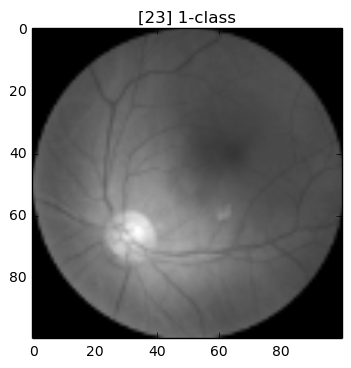

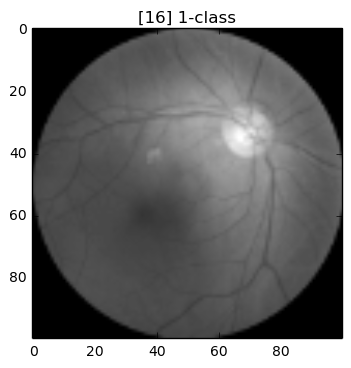

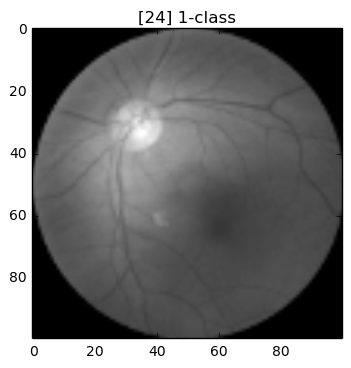

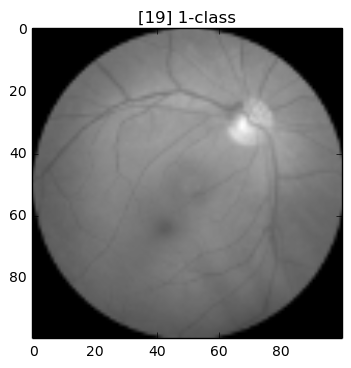

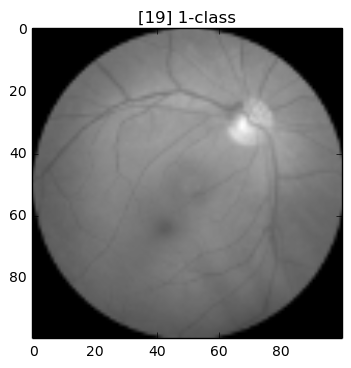

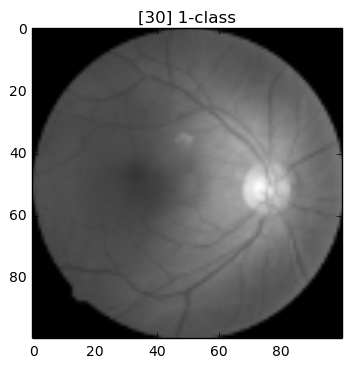

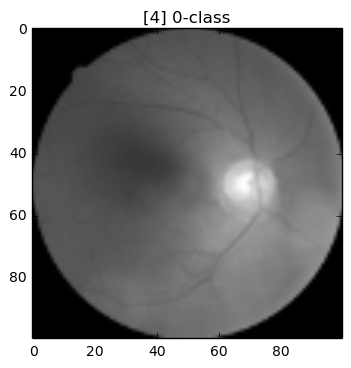

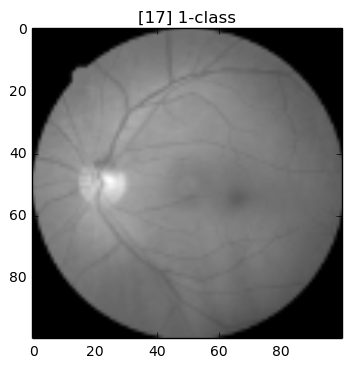

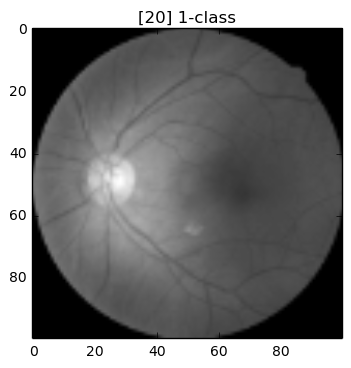

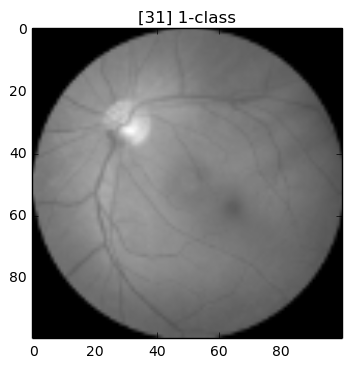

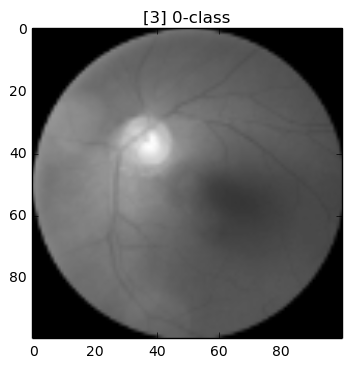

In [12]:
imgsize    = [100, 100, 1];
nclass     = len(paths)
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt     = 0 
rawimg     = []
rszimg     = []
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    temp = 0
    print ("%d-class can have upto %d images" % (i, len(flist)))
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath   = os.path.join(path, f)
        currimg    = imread(fullpath)
        imgsmall   = imresize(currimg, [imgsize[0], imgsize[1]])/255.
        if imgsize[2] == 1:
            imgsmall = rgb2gray(imgsmall)        
        imgvec     = np.reshape(imgsmall, (1, -1))
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg   = imgvec
            totallabel = curr_label
        else:
            totalimg   = np.concatenate((totalimg, imgvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        rawimg.append(currimg)
        rszimg.append(imgsmall)        
        imgcnt = imgcnt + 1
        temp = temp + 1
        if temp > 1000:
            break
    print ("%d-class has %d images" % (i, temp))
print ("TOTAL %d IMAGES LOADED." % (imgcnt))

for i in np.random.randint(imgcnt, size=5):
    plt.subplot(1, 2, 1)
    plt.imshow(rawimg[i], cmap='gray')
    plt.title("ORIGINAL IMAGE")
    plt.subplot(1, 2, 2)
    plt.imshow(rszimg[i], cmap='gray')
    plt.title("RESIZED IMAGE")
    plt.show()

randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]

print("%d TRAIN AND %d TEST IMAGES" % (len(trainidx), len(testidx)))
print("EACH IAMGE IS (%d, %d, ) = %d-DIMENSINOAL VECTOR" 
      % (imgsize[0], imgsize[1], trainimg.shape[1]))

savepath = cwd + "/data_retina.npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel, imgsize=imgsize)
print ("DATA SAVED TO %s" % (savepath))

randidx = np.random.randint(imgcnt, size = 30)
for i in randidx: 
    currlabel = np.argmax(totallabel[i, :]) 
    if imgsize[2] == 1:
        currimg = np.reshape(totalimg[i, :], (imgsize[0], imgsize[1]))
        plt.imshow(currimg, cmap='gray')
    else:
        currimg = np.reshape(totalimg[i, :], (imgsize[0], imgsize[1], -1))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show() 


In [ ]:
def print_np(x):
    print ("Type is %s" % (type(x)))
    print("Shape is %s" % (x.shape,))
    print("Value are: \n%s"% (x))

In [ ]:
print_np(trainimg)

In [ ]:
print_np(trainlabel)

In [ ]:
print_np(testimg)

In [ ]:
print_np(testlabel)

In [ ]:
print_np(imgsize)